In [1]:
import pandas as pd 
from pathlib import Path

path = Path('data')
df = pd.read_csv(path/'train.csv')
df2 = pd.read_csv(path/'test.csv')
chip_ids_train = df['chip_id'].unique()
chip_ids_test = df2['chip_id'].unique()
len(chip_ids_train), len(chip_ids_test)

(8689, 2773)

In [2]:
months = df['month'].unique()
months

array(['September', 'October', 'November', 'December', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August'],
      dtype=object)

In [3]:
month_ids = df.filename.apply(lambda x: x.split('_')[-1].split('.')[0]).unique()
month_ids

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11'], dtype=object)

In [4]:
sensors = df['satellite'].unique()
sensors

array(['S1', 'S2'], dtype=object)

In [5]:
from tqdm import tqdm 

def generate_df(chip_ids, features, add_label=True):
    filenames, labels  = [], []
    for chip_id in tqdm(chip_ids):
        names = {'S1': {}, 'S2': {}}
        for sensor in sensors:
            for month, month_id in zip(months, month_ids):
                filepath = f'{chip_id}_{sensor}_{month_id}.tif'
                if (path/features/filepath).exists():
                    names[sensor][month] = str(path/features/filepath) 
                else:
                    names[sensor][month] = None
        filenames.append(names)
        if add_label:
            labels.append(f'{str(path)}/train_agbm/{chip_id}_agbm.tif')
    if add_label:
        return pd.DataFrame({'filename': filenames, 'label': labels}, index=chip_ids)
    return pd.DataFrame({'filename': filenames}, index=chip_ids)

train_df = generate_df(chip_ids_train, 'train_features')
test_df = generate_df(chip_ids_test, 'test_features', False)

100%|██████████| 2773/2773 [00:00<00:00, 3583.82it/s]


In [6]:
train_df

,filename,label
0003d2eb,{'S1': {'September': 'data/train_features/0003...,data/train_agbm/0003d2eb_agbm.tif
000aa810,{'S1': {'September': 'data/train_features/000a...,data/train_agbm/000aa810_agbm.tif
000d7e33,{'S1': {'September': 'data/train_features/000d...,data/train_agbm/000d7e33_agbm.tif
00184691,{'S1': {'September': 'data/train_features/0018...,data/train_agbm/00184691_agbm.tif
001b0634,{'S1': {'September': 'data/train_features/001b...,data/train_agbm/001b0634_agbm.tif
...,...,...
ffc563f4,{'S1': {'September': 'data/train_features/ffc5...,data/train_agbm/ffc563f4_agbm.tif
ffc730b9,{'S1': {'September': 'data/train_features/ffc7...,data/train_agbm/ffc730b9_agbm.tif
ffc7d4f2,{'S1': {'September': 'data/train_features/ffc7...,data/train_agbm/ffc7d4f2_agbm.tif
ffd8db7a,{'S1': {'September': 'data/train_features/ffd8...,data/train_agbm/ffd8db7a_agbm.tif


In [7]:
test_df

,filename
00a28320,{'S1': {'September': 'data/test_features/00a28...
01047f47,{'S1': {'September': 'data/test_features/01047...
0128a38e,{'S1': {'September': 'data/test_features/0128a...
0169bbe3,{'S1': {'September': 'data/test_features/0169b...
0189741b,{'S1': {'September': 'data/test_features/01897...
...,...
ff9dfc68,{'S1': {'September': 'data/test_features/ff9df...
ffda6cc9,{'S1': {'September': 'data/test_features/ffda6...
ffde1ed8,{'S1': {'September': 'data/test_features/ffde1...
ffdfa26a,{'S1': {'September': 'data/test_features/ffdfa...


In [8]:
train_df.to_json(path/'train.json')
test_df.to_json(path/'test.json')

In [2]:
train_df = pd.read_json(path/'train.json')
test_df = pd.read_json(path/'test.json')

In [3]:
train_df

,filename,label
0003d2eb,{'S1': {'September': 'data/train_features/0003...,data/train_agbm/0003d2eb_agbm.tif
000aa810,{'S1': {'September': 'data/train_features/000a...,data/train_agbm/000aa810_agbm.tif
000d7e33,{'S1': {'September': 'data/train_features/000d...,data/train_agbm/000d7e33_agbm.tif
00184691,{'S1': {'September': 'data/train_features/0018...,data/train_agbm/00184691_agbm.tif
001b0634,{'S1': {'September': 'data/train_features/001b...,data/train_agbm/001b0634_agbm.tif
...,...,...
ffc563f4,{'S1': {'September': 'data/train_features/ffc5...,data/train_agbm/ffc563f4_agbm.tif
ffc730b9,{'S1': {'September': 'data/train_features/ffc7...,data/train_agbm/ffc730b9_agbm.tif
ffc7d4f2,{'S1': {'September': 'data/train_features/ffc7...,data/train_agbm/ffc7d4f2_agbm.tif
ffd8db7a,{'S1': {'September': 'data/train_features/ffd8...,data/train_agbm/ffd8db7a_agbm.tif


In [24]:
sample = train_df.iloc[100]
s1 = sample.filename['S1']['September']
s2 = sample.filename['S2']['September']
label = sample.label

s1, s2, label

('data/train_features/02de88e0_S1_00.tif',
 'data/train_features/02de88e0_S2_00.tif',
 'data/train_agbm/02de88e0_agbm.tif')

In [25]:
import rasterio as rio 

ds = rio.open(s1)
ds.indexes

(1, 2, 3, 4)

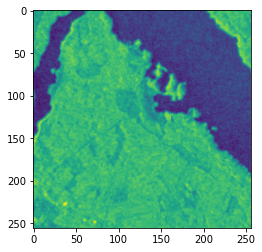

In [26]:
import matplotlib.pyplot as plt

x = ds.read(1)
plt.imshow(x)
plt.show()

In [27]:
x.shape, x.min(), x.max(), x.dtype

((256, 256), -23.05067, -3.3051589, dtype('float32'))

In [28]:
ds = rio.open(s2)
ds.indexes

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)

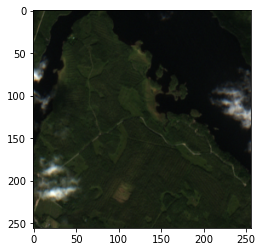

In [29]:
import numpy as np 

r, g, b = ds.read(3), ds.read(2), ds.read(1)
rgb = np.dstack((r, g, b))
rgb = np.clip(rgb / 3000, 0, 1)

plt.imshow(rgb)
plt.show()

In [30]:
rgb.dtype, rgb.shape, rgb.min(), rgb.max()

(dtype('float64'), (256, 256, 3), 0.016, 1.0)

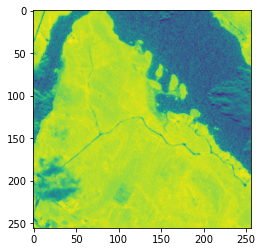

In [31]:
red = ds.read(3).astype(np.float32)
nir = ds.read(7).astype(np.float32)
ndvi = (nir - red) / (nir + red)
plt.imshow(ndvi)
plt.show()

In [32]:
ndvi.dtype, ndvi.shape, ndvi.min(), ndvi.max()

(dtype('float32'), (256, 256), -0.32484075, 0.86929715)

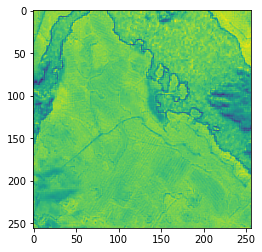

In [33]:
swir = ds.read(9).astype(np.float32)
nir = ds.read(7).astype(np.float32)
ndwi = (nir - swir) / (nir + swir)
plt.imshow(ndwi)
plt.show()

In [34]:
ndwi.dtype, ndwi.shape, ndwi.min(), ndwi.max()

(dtype('float32'), (256, 256), -0.70163935, 0.59681946)

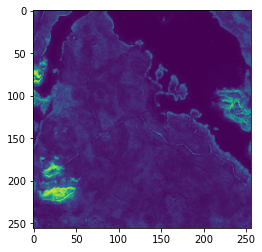

In [35]:
clouds = ds.read(11)

plt.imshow(clouds)
plt.show()

In [17]:
clouds.dtype, clouds.shape, clouds.min(), clouds.max()

(dtype('uint16'), (256, 256), 0, 54)

In [75]:
ds = rio.open(label)
ds.indexes

(1,)

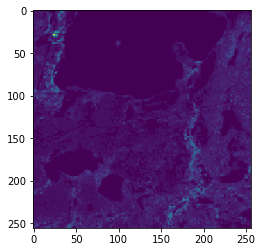

In [76]:
y = ds.read(1)
plt.imshow(y)
plt.show()

In [77]:
y.dtype, y.shape, y.min(), y.max()

(dtype('float32'), (256, 256), 0.0, 130.34)

In [83]:
# compute max and min values of all labels

maxs, mins, means, stds = [], [], [], []
for chip_id, row in tqdm(train_df.iterrows()):
    ds = rio.open(row.label)
    y = ds.read(1)
    maxs.append(y.max())
    mins.append(y.min())
    means.append(y.mean())
    stds.append(y.std())

0it [00:00, ?it/s]/home/juan/miniconda3/lib/python3.8/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
8689it [00:12, 681.69it/s]


In [84]:
np.max(maxs), np.min(mins), np.mean(means), np.mean(stds)

(12905.3, 0.0, 63.32611, 63.45661)